# 7 Statistics with NumPy
## 7_8A Exercises
- np.sort
- np.histogram()        | bins=, range=(,)
- np.histogram2d()      |
- np.histogramdd()
- array.flat
- NAN equiv functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import Generator as gen 
from numpy.random import PCG64 as pcg 

sns.set_style('darkgrid')
#sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
np.__version__

'1.26.4'

In [2]:
array_RG = gen(pcg(seed=365))

In [3]:
# Function show_attr

def show_attr(arrnm: str) -> str:
    strout = f' {arrnm}: '

    for attr in ('shape', 'ndim', 'size', 'dtype'):     #, 'itemsize'):
            arrnm_attr = arrnm + '.' + attr
            strout += f'| {attr}: {eval(arrnm_attr)} '

    return strout

In [4]:
# Function that Compute and plot NumPy 2-D histogram

def histo2d_w_graph(xv: np.ndarray, yv: np.ndarray,
                    bs: int = 10, sid: bool = False):
    ''' Compute and plot NumPy 2-D histogram
    
    xv: xvalues, 1-D ndarray, first axis, X
    yv: yvalues
    bs: -optional- Bins number, default '10'
    sid: -optinal- Show Input Data, default 'False'
    ''' 
    # h2df: NumPy Histogram 2-D inside function
    h2df = np.histogram2d(x=xv, y=yv, bins=bs)

    # n_da: NumPy density array; x_e: X_edges; y_e: Y_edges
    n_da, x_e, y_e = h2df[0], h2df[1], h2df[2]

    # Seaborn two subplots graphs
    fig, axs = plt.subplots(ncols=2, figsize=(10,6))
    plt.subplots_adjust(wspace=0.3)

    h2d_plot = sns.histplot(x=xv, y=yv, ax=axs[0], bins=bs)
    h2d_plot.set(xticks=x_e, yticks=y_e)
    h2d_plot.set_title('2-D Histogram')

    sct = sns.scatterplot(x=xv, y=yv, ax=axs[1])
    sct.set(xticks=x_e, yticks=y_e)
    sct.set_title('Scatter plot')

    if sid:
      print(f'Input Data:\n X values: {xv}\n Y values: {yv}\n')

    print(f'NumPy Density Array:\n{n_da}')
    print(f'X Edges:\n {x_e}')
    print(f'Y Edges:\n {y_e}\n')
    print(f'Density Array with relocated values:\n'
          f'{np.array(list(map(lambda row: row[::-1], n_da))).T}')
    
    plt.show()

### 1. If a dataset contains missing values represented by np.nan, the np.nanvar() function will return NaN as the output.
- False
- The np.nanvar() function calculates the variance while ignoring the NaN values in the dataset. It only returns NaN if the entire dataset consists of NaN values.

In [5]:
# Ex.
A = np.random.randint(10, size=(2,3)).astype(np.float16)
display(A, np.var(A), np.nanvar(A))

A[0,2] = A[1,0] = np.nan
display(A, np.var(A), np.nanvar(A))


array([[9., 9., 9.],
       [9., 7., 4.]], dtype=float16)

3.475

3.475

array([[ 9.,  9., nan],
       [nan,  7.,  4.]], dtype=float16)

nan

4.188

### Other exercises to practice


In [6]:
# Q4 Sort a flattened version of the array
A = np.array([[12,34,-15,56], [23,22,90,-56],
              [4,-19,27,31], [45,56,61,70]])
display(A)
show_attr('A')

array([[ 12,  34, -15,  56],
       [ 23,  22,  90, -56],
       [  4, -19,  27,  31],
       [ 45,  56,  61,  70]])

' A: | shape: (4, 4) | ndim: 2 | size: 16 | dtype: int32 '

In [7]:
display(np.sort(A, axis=None))
display(np.sort(np.reshape(A, (16,))))
display(np.sort(A).reshape(16,))        # BAD

array([-56, -19, -15,   4,  12,  22,  23,  27,  31,  34,  45,  56,  56,
        61,  70,  90])

array([-56, -19, -15,   4,  12,  22,  23,  27,  31,  34,  45,  56,  56,
        61,  70,  90])

array([-15,  12,  34,  56, -56,  22,  23,  90, -19,   4,  27,  31,  45,
        56,  61,  70])

In [8]:
display(A)
display(np.sort(A))             # Idem np.sort(A, axis=1)
display(np.sort(A, axis=1))
display(np.sort(A, axis=0))

array([[ 12,  34, -15,  56],
       [ 23,  22,  90, -56],
       [  4, -19,  27,  31],
       [ 45,  56,  61,  70]])

array([[-15,  12,  34,  56],
       [-56,  22,  23,  90],
       [-19,   4,  27,  31],
       [ 45,  56,  61,  70]])

array([[-15,  12,  34,  56],
       [-56,  22,  23,  90],
       [-19,   4,  27,  31],
       [ 45,  56,  61,  70]])

array([[  4, -19, -15, -56],
       [ 12,  22,  27,  31],
       [ 23,  34,  61,  56],
       [ 45,  56,  90,  70]])

In [9]:
# Q5 For Q5, you are right, it gives 25.6
# Q6 
cols = gen(pcg(seed=365))
c_1 = cols.normal(loc=3, scale=2, size=500)
c_2 = cols.exponential(scale=5, size=500)
c_3 = cols.logistic(loc=10, scale=4, size=500)

np.max(np.array([c_1, c_2, c_3]).T)

35.04153699695336

- Histogram: a way to examine a dataset by dissecting (diseccionando - dividiendo - estudiando) its density.
- Density: how populated a given area is - stats -> How many values from a dataset fall within some predetermined range

In [10]:
# Question 8 part D answers are wrong. Histogram for 3-D was drawn not for 2D.
# Question 9 title in Statistics-With-NumPy-Solution should be "For the 2-D array" and not for 3-D.

In [11]:
# Q6 
c_q = np.random.randint(low=0, high=40, size=200)
hs = np.histogram(c_q, bins=(0,10,16,22,28,34,40))
hs

(array([49, 32, 29, 28, 32, 30], dtype=int64),
 array([ 0, 10, 16, 22, 28, 34, 40]))

<function matplotlib.pyplot.show(close=None, block=None)>

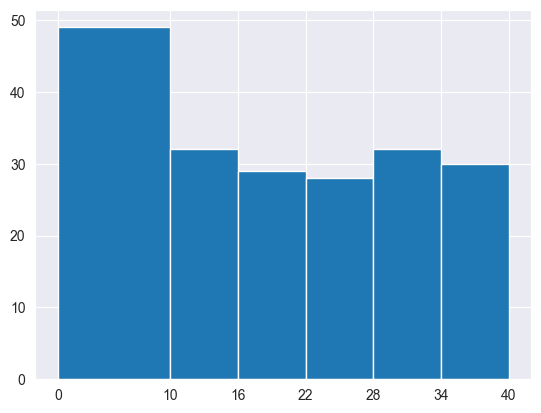

In [12]:
plt.hist(c_q, bins=hs[1])
plt.xticks(hs[1])
plt.show

In [13]:
# Q2 Obtain the minimum for each columns
t1 = np.genfromtxt('Lending-Company-Numeric-Data.csv', delimiter=',')
display(np.min(t1))                       # Only to show the total min
display(np.min(t1, axis=0))
display(np.minimum.reduce(t1, axis=0))
display(np.minimum.reduce(t1))
display(np.minimum.reduce(t1, axis=1))      # NO they are files

-2870.0

array([ 1000.,    35.,   365., -2870., -2870.,  -350.])

array([ 1000.,    35.,   365., -2870., -2870.,  -350.])

array([ 1000.,    35.,   365., -2870., -2870.,  -350.])

array([40., 40., 40., ..., 40., 40., 40.])

#### NAN-equiv functs. are useful when we have incomplete data.
- They run while ignoring all NAN values in the data.
- It would be in our best interest to find and fill any missing values, if we have the chance.

In [14]:
A = np.array([[1,0,0,3,1],
              [3,6,6,2,9],
              [4,5,3,8,0]])
display(A)
print(show_attr('A'))

B = np.array([[1,0,0,3,1],
              [3,6,np.nan,2,9],
              [4,5,3,8,0]])
display(B)
print(show_attr('B'))


array([[1, 0, 0, 3, 1],
       [3, 6, 6, 2, 9],
       [4, 5, 3, 8, 0]])

 A: | shape: (3, 5) | ndim: 2 | size: 15 | dtype: int32 


array([[ 1.,  0.,  0.,  3.,  1.],
       [ 3.,  6., nan,  2.,  9.],
       [ 4.,  5.,  3.,  8.,  0.]])

 B: | shape: (3, 5) | ndim: 2 | size: 15 | dtype: float64 


In [15]:
# np.nanmean() vs np.mean() in a non-nan array
display(np.isnan(np.sum(A)))

print(np.nanmean(A), ' - ', np.nanmean(A, axis=0))
print(np.mean(A), ' - ', np.mean(A, axis=0))

False

3.4  -  [2.66666667 3.66666667 3.         4.33333333 3.33333333]
3.4  -  [2.66666667 3.66666667 3.         4.33333333 3.33333333]


In [16]:
# np.nanmean() vs np.mean() in an array with NANs
display(np.isnan(np.sum(B)))

print(np.nanmean(B), '\t- ', np.nanmean(B, axis=0))
print(np.mean(B), '\t\t\t- ', np.mean(B, axis=0))

# np.mean() does not provide any numeric value when facing incomplete data
# Only provides NAN (propagate NANs)

True

3.2142857142857144 	-  [2.66666667 3.66666667 1.5        4.33333333 3.33333333]
nan 			-  [2.66666667 3.66666667        nan 4.33333333 3.33333333]


In [17]:
# .qunatile() case
display(np.quantile(B, 0.7))
display(np.nanquantile(B, 0.7))

nan

4.1

In [18]:
# or Variance
display(np.var(B))
display(np.nanvar(B))
np.var(B[~np.isnan(B)])

nan

7.882653061224489

7.882653061224489

In [19]:
display(np.histogram(B[~np.isnan(B)], bins=6))


(array([5, 1, 4, 1, 1, 2], dtype=int64),
 array([0. , 1.5, 3. , 4.5, 6. , 7.5, 9. ]))

In [20]:
def ten(x):
    x = 10
    return x

print(ten([1,2,3]))

10


In [21]:
np.histogram(B, bins=6)

ValueError: autodetected range of [nan, nan] is not finite

In [46]:
h2d = np.histogram2d(B[0], B[1], bins=4)
display(h2d)
# np.array(list(map(lambda row: row[::-1], h2d[0]))).T

ValueError: autodetected range of [nan, nan] is not finite